<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/main/Assignments/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 3

**Submission deadline:**
* **lab session in the week 27.11-1.12 2023**

**Points: 1+2+3=6 points**

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com).

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

In [ ]:
!python3 -m pip install -q gdown httpimport

In [ ]:
# Standard IPython notebook imports
import itertools
import io
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sopt
import scipy.stats as sstats
import seaborn as sns
import sklearn.ensemble
import sklearn.tree
from sklearn import datasets
from tqdm.auto import tqdm

import httpimport

# In this way we can import functions straight from github
with httpimport.github_repo(
    "janchorowski", "nn_assignments"
):
    from common.gradients import check_gradient
    from common.plotting import plot_mat

sns.set_style("whitegrid")

In [ ]:
# Repeat notebook initialization and data loading

import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neighbors
import seaborn as sns
import matplotlib.pyplot as plt

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Categorical(iris.target_names[iris.target])

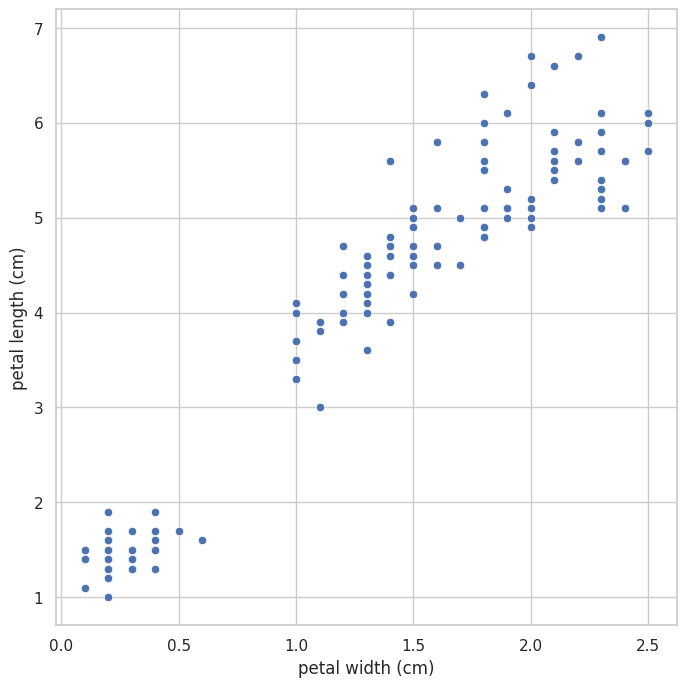

In [ ]:
reg_feature='petal width (cm)'
reg_target='petal length (cm)'

# plot the length-widt relation
sns.scatterplot(x=reg_feature, y=reg_target, data=iris_df)
sns.set(rc={'figure.figsize':(8,8)})


# Problem 1 [1p] Linear Regression

In [ ]:
class LinearRegression:
    def __init__(self):
        self.Theta = np.zeros(2)

    def fit(self, X, y):
        X_extended = np.c_[np.ones(X.shape[0]), X]
        self.Theta= np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y

    def predict(self, X):
        X_extended = np.c_[np.ones(X.shape[0]), X]
        predictions = X_extended @ self.Theta
        return predictions


In [ ]:
X = iris_df[[reg_feature]]
y = iris_df[reg_target]

In [ ]:
model = LinearRegression()
model.fit(X,y)

In [ ]:
print(model.Theta)

[1.08355803 2.2299405 ]


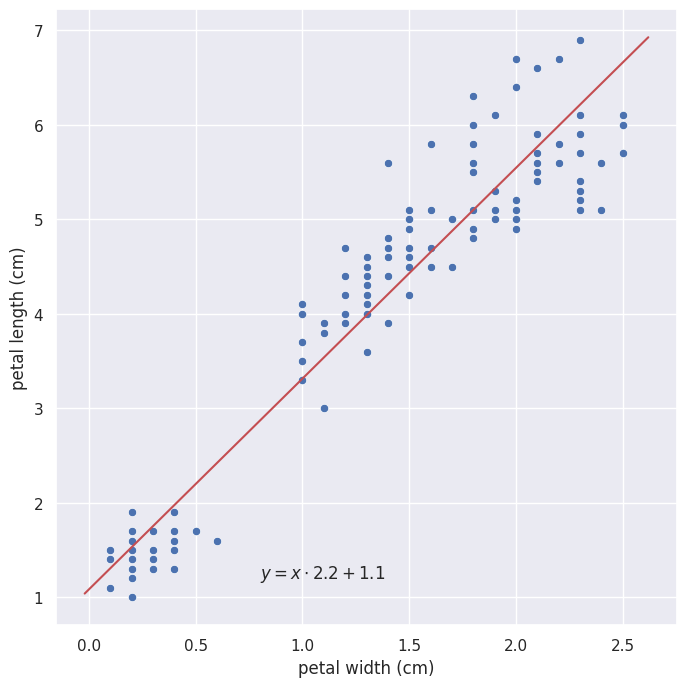

In [ ]:
# plot the length-widt relation
sns.scatterplot(x=reg_feature, y=reg_target, data=iris_df)
sns.set(rc={'figure.figsize':(8,8)})

# plot the proposed relationship
length_bounds = np.array(plt.xlim())
width_predictions = model.Theta[1] * length_bounds + model.Theta[0]

plt.plot(length_bounds, width_predictions, color='r')
_ = plt.text(0.8, 1.2, f"$y = x \cdot {float(model.Theta[1]):0.2} + {float(model.Theta[0]):0.2}$")

# Problem 2 PolyRegression

Consider the following dataet which is created by the following probabilistic model:



1. $x \sim U[0,1]$: first $x$ is sampled uniformly from the  $[0,1]$ range.
2. $y \sim 1+2x-5x^2 + 4x^3 + \mathcal{N}(\mu=0, \sigma=0.1)$: then
    $y$ is a polynomial of $x$ plus random noise sampled from the Normal distribution with mean
    $\mu=0$ and standard deviation $0.1$


In [ ]:
#
# The true polynomial relation:
# y(x) = 1 + 2x -5x^2 + 4x^3
#

true_poly_theta = np.array(
    [1.0, 2.0, -5, 4]
)

def powers_of_X(X, degree):
    powers = np.arange(degree + 1).reshape(1, -1)
    #print(X.shape, powers.shape)
    return X ** powers



def compute_polynomial(X, Theta):
    XP = powers_of_X(X, len(Theta) - 1)
    Y = XP @ Theta.reshape(-1, 1)
    return Y

def make_dataset(N, theta=true_poly_theta, sigma=0.1):
    """ Sample a dataset """
    X = np.random.uniform(size=(N, 1))
    Y_clean = compute_polynomial(X, theta)
    Y = Y_clean + np.random.randn(N, 1) * sigma
    return X, Y



np.random.seed(0)
train_data = make_dataset(30)


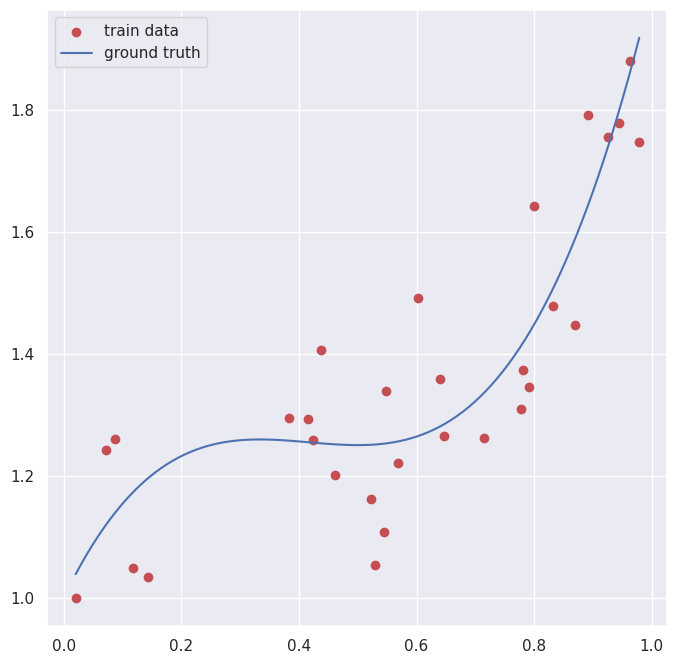

In [ ]:
XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
YY = compute_polynomial(XX, true_poly_theta)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.legend(loc="upper left")

## Problem 2.1 [1p] Implement class `PolynomialRegression` numerically unstable

Directly apply the formula $$\Theta = (X^T X) ^{-1} X^T Y$$ as in the iris case, which fits a polynomial of a given degree. Use `np.linalg.inv` as the inverse operator. The output may be numerically unstable and may look as below.

In [ ]:
class PolynomialRegressionUnstable:
    def __init__(self, deg):
        self.deg = deg
        self.coefficients = None

    def fit(self, X, y):

        X_poly = powers_of_X(X, self.deg)
        self.coefficients = (np.linalg.inv(X_poly.T@X_poly) @ X_poly.T )@ y

    def predict(self, X):

        predictions = compute_polynomial(X, self.coefficients)

        return predictions


In [ ]:
def mse(y_true, y_pred):
    return ((y_pred - y_true)**2).mean()

MSE: 30.058877559521513


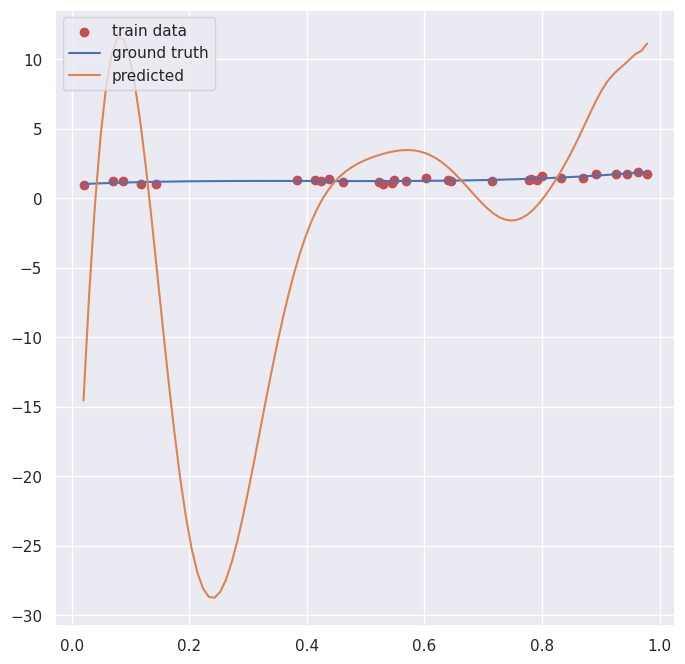

In [ ]:
X, y = train_data[0], train_data[1]

model = PolynomialRegressionUnstable(deg=50)
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:", mse(y, y_pred))
XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)

plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

The above plot shouldn't look like that --- since we have 30 points and a polynomial of degree 50, it should fit points almost perfectly. Still, it's quite clear that too big of a degree overfits the data.

## Problem 2.2 [1p] Implement class `PolynomialRegression` numerically stable

In the formula $$\Theta = (X^T X) ^{-1} X^T Y$$ the expression $$(X^T X) ^{-1} X^T $$ is sometimes called the Moore-Penrose Inverse. Computing it directly can sometimes be problematic due to numerical errors, but there are dedicated functions that compute it better.
Hence, apply the formula $$\Theta = (X^T X) ^{-1} X^T Y$$ but this time use `np.linalg.pinv`, i.e., the Moore-Penrose inverse directly. The output should be more like the one below.

In [ ]:
class PolynomialRegressionStable:
    def __init__(self, deg):
        self.deg = deg
        self.coefficients = None

    def fit(self, X, y):
        X_poly = powers_of_X(X, self.deg)

        self.coefficients = np.linalg.pinv(X_poly) @ y

    def predict(self, X):
        predictions = compute_polynomial(X, self.coefficients)

        return predictions

In [ ]:
X, y = train_data[0], train_data[1]

model = PolynomialRegressionStable(deg=50)
model.fit(X,y)
y_pred = model.predict(X)
print("MSE:", mse(y, y_pred))

MSE: 0.0017716591838318847


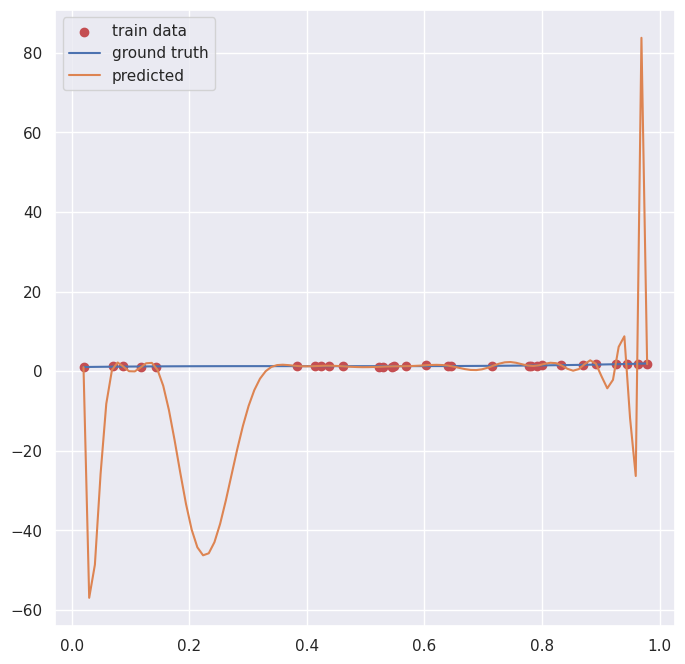

In [ ]:
XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)

plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

# Problem 3 Regularized PolyRegression

As you can see above, the polynomial regression is prone to overfitting.
One way of dealing with it is Ridge type of regularization.
In this case the function which measures the fitness of the model is

$$ J_{\mbox{reg}}(\Theta) = \frac{1}{N}\sum_{i=1}^N (y^{(i)} - x^{(i)}\Theta)^2 +  \frac{\alpha}{N} \sum_j \Theta_j^2 = \text{MSE} + \text{Regularization}$$



## Problem 3.1 [1p] Closed form solution for $\Theta$

Without the regularization the closed form formula for $\Theta$ was $\Theta = (X^T X) ^{-1} X^T Y$ as shown during the lecture. Adopt the same line of math to get the closed form formula for $\Theta$ which minimizes $J_{\mbox{reg}}$.



Minimizing $ J_{\mbox{reg}}(\Theta)$ is equivalent to minimizing $\frac{J_{\mbox{reg}}(\Theta)}{N}$.  $$ \nabla_\Theta [\frac{J_{\mbox{reg}}(\Theta)}{N}]=\nabla_\Theta [(X\Theta- y)^T (X\Theta- y) +   \alpha\Theta^T\Theta]=\nabla_\Theta(y^Ty-y^TX\Theta-\Theta^TX^Ty+\Theta^TX^TX\Theta)+\nabla_\Theta(\Theta^T\alpha I \Theta)=2(X^TX\Theta-X^Ty)+2\alpha I \Theta $$ Now, by setting the gradient equal to $0$, we have $(X^TX+\alpha I)\Theta=X^Ty$, which gives $\Theta=(X^TX+\alpha I)^{-1}X^Ty$.

## Problem 3.2 [1p] Implement PolyRidgeRegression

**Remark** use the `np.linalg.inv` cause the Moore-Penrose `np.linalg.pinv` is hard to apply here. We may allow for numerical unstability here, because the regularization term will fix a bit the problems itself. So use similar code as in `PolynomialRegressionUnstable`.

In [ ]:
class PolyRidgeRegression:
    def __init__(self, deg,alpha):
        self.deg = deg
        self.alpha=alpha
        self.coefficients = None


    def fit(self, X, y):
        X_poly = powers_of_X(X, self.deg)

        self.coefficients = (np.linalg.inv((X_poly.T@ X_poly )+np.diag([self.alpha] * (self.deg+1))) @X_poly.T)@ y

    def predict(self, X):
        predictions = compute_polynomial(X, self.coefficients)

        return predictions

In [ ]:
X, y = train_data[0], train_data[1]

MSE: 30.058877559521513


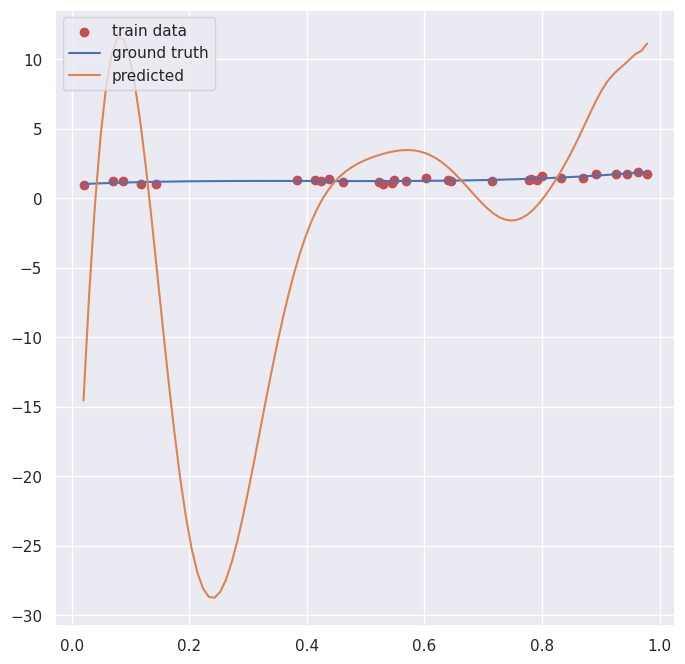

In [ ]:
#with alpha=0 it's without the regularization,
#due to the lack of numerical stability of our simple algorithm
#the image below that you will obtain can be funky and different from the one posted in the assignment
#point being, don't worry about the alpha=0 case, we want your algorithm to work for proper alphas

model = PolyRidgeRegression(deg=50, alpha=0)

model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

MSE: 0.015067034615160147


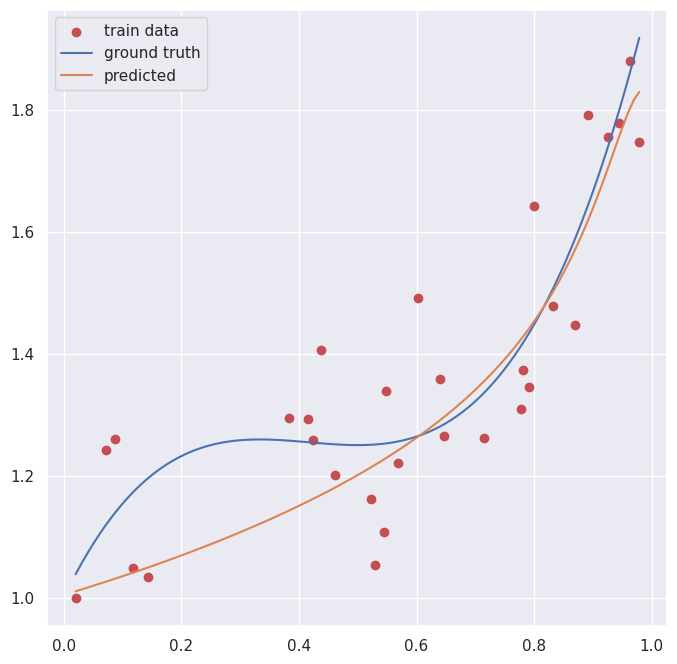

In [ ]:
model = PolyRidgeRegression(deg=50, alpha=1.) #with alpha=1 you can see already a better fit

model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

## Problem 3.3 [1p] finding best alpha and degree

Perform leave one out error estimation on the `train_data` to get the best $(d, \alpha)$ pair out of $\alpha \in \{0., 0.1, 0.5, 1., 5, 10, 50, 100, 500\}$ and $d \in \{1, 2, 4, 16, 32, 64\}$. The the error is measured via MSE.

MSE: 1.4981916798828183


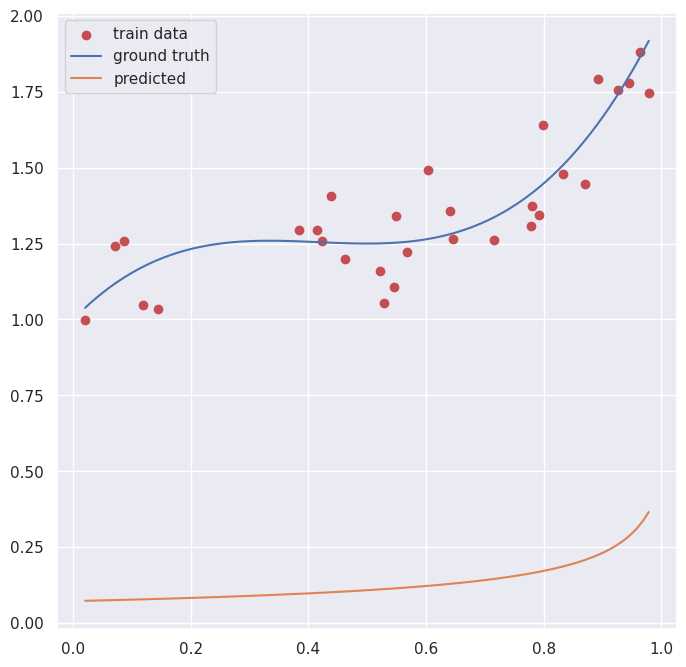

In [ ]:
model = PolyRidgeRegression(deg=64, alpha=500)

model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")

In [ ]:

degrees = [1, 2, 4, 16, 32, 64]
alphas = [0, 0.1, 0.5, 1, 5, 10, 50, 100, 500]

best_degree = None
best_alpha = None
mini_mse = float('inf')

for degree in degrees:
    for alpha in alphas:
        mse_sum = 0
        n = len(X)

        for i in range(n):
            X_loo = np.delete(X, i, axis=0)
            y_loo = np.delete(y, i, axis=0)

            model = PolyRidgeRegression(degree, alpha)
            model.fit(X_loo, y_loo)
            y_pred = model.predict(X[i])
            mse_sum += mse(y[i], y_pred)

        avg_mse = mse_sum / n

        if avg_mse < mini_mse:
            best_degree = degree
            best_alpha = alpha
            mini_mse = avg_mse

print("Best degree:", best_degree, "Best alpha:", best_alpha,"Best MSE", mini_mse)

Best degree: 64 Best alpha: 0.1 Best MSE 0.01583048502539331


MSE: 0.011747337511324384


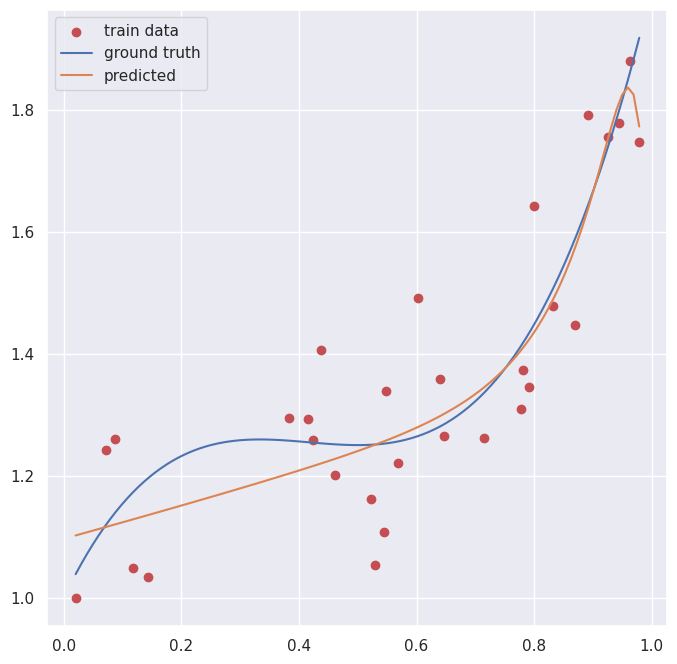

In [ ]:
model = PolyRidgeRegression(deg=best_degree, alpha=best_alpha)

model.fit(X,y)
y_pred = model.predict(X)
print("MSE:",mse(y, y_pred))


XX = np.linspace(train_data[0].min(), train_data[0].max(), 100).reshape(-1, 1)
plt.scatter(train_data[0], train_data[1], label="train data", color="r")
plt.plot(XX, compute_polynomial(XX, true_poly_theta), label="ground truth")
plt.plot(XX, model.predict(XX), label="predicted")
plt.legend(loc="upper left")